In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

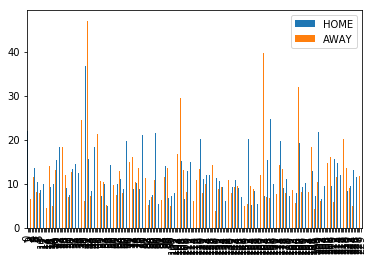

In [2]:
#Add Dataframe for Home and away
df = pd.DataFrame(columns=['HOME', 'AWAY'])

#Loop through each game and look for PPDA div class
for i in range(9577,9807):
    ppda_url = 'https://understat.com/match/' + str(i)
    ppda_data = requests.get(ppda_url)
    ppda_html = ppda_data.content
    soup = BeautifulSoup(ppda_html, 'lxml')
    ppda = soup.find("div", string='PPDA')
    #Find both the home and away team
    home = ppda.findNext('div', {'class':"progress-value"})
    df = df.append({'HOME': float(home.text), 'AWAY' : float(home.findNext('div', {'class':"progress-value"}).text)}, ignore_index=True)
#print (df)
df.to_csv("ppda2.csv", encoding='utf-8', index=False)
df.plot.bar()
plt.show()